Rosenblatt’s Perceptron算法求解二分类问题
==================

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0xff)

在本例中，我们先定义二分类问题：在一个高维空间中有$N$个点，其中一些点属于正集合，其他点属于负集合。目标是找出一个超平面，使得都有正集合中的点都在该超平面的一边，负集合的点在该超平面的另一边。

下图是一个2维平面上的例子：

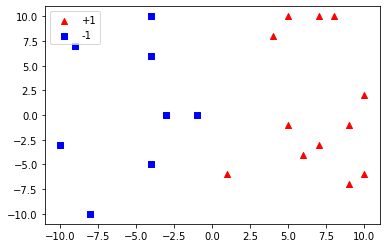

In [2]:
points = np.array([(np.random.randint(-10, 11), np.random.randint(-10, 11)) for _ in range(20)])
w0 = np.array([7.3, -3.6])
b0 = 1.7

positive_points = points[np.dot(points, w0) + b0 > 0]
negative_points = points[np.dot(points, w0) + b0 < 0]

plt.scatter(positive_points[:, 0], positive_points[:, 1], marker='^', color='red', label='+1')
plt.scatter(negative_points[:, 0], negative_points[:, 1], marker='s', color='blue', label='-1')
plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.legend()
plt.show()

上图中三角节点属于正集合，正方形节点属于负集合，我们需要找出一条直线将他们切分开，及寻找参数$w$和$b$，使得：

$$
\forall_{x \in positive points} w^T x + b > 0 \\
\forall_{x \in negative points} w^T x + b < 0
$$

其中$w$是一个维度和$x$相同的向量，$b$是一个标量。

为了简化之后的处理，我们给每个点赋予一个标准输出，对于正集合中的点其标准输出为$1$，负集合中的点对应的标准输出为$-1$，这样处理之后我们可以将正集合和负集合中的点统一处理。

注意到超平面的公式中存在一个常数项$b$，为了统一处理，我们将每个点都进行扩展，**给每个点添加一个维度，该维度上的值为$1$**（比如原来一个点为$(-4, 7)$，经过扩展之后，变成$(-4, 7, 1)$），这样扩展之后，我们的目标变为寻找参数$w$使得以下式子成立：

$$
\forall_{(x, y) \in samples} sign(w^T x) = y
$$

式中$x$就是所有的点，$y$为该点对应的标准输出（如果$x$位于正集合则为$1$，否则等于$-1$）,$sign$函数是符号函数：

$$
sign(d) = \left\{
\begin{aligned}
1 \quad & d > 0 \\
-1 \quad & d < 0 \\
0 \quad & d = 0
\end{aligned}
\right.
$$

**如果输入数据是可分的，那么可以使用Rosenblatt’s Perceptron算法找到一个满足条件的超平面。**

Rosenblatt’s Perceptron算法的核心思想是初始化超平面参数$w=0$，然后迭代选择数据中的每个点，如果当前超平面参数无法正确分类该点，则修改超平面参数，不断迭代知道收敛。算法伪代码如下：

1. 初始化$w=0$
2. 枚举每个数据点$x$和对应的输出$y$
3. 如果$sign(w^T x) != y$，则更新参数$w = w + y * x$
4. 如果当前参数能够正确分类所有点，则退出，否则回到第2步


In [3]:
# 对数据点进行扩展
x = np.concatenate([positive_points, negative_points])
x = np.concatenate([x, np.ones((len(x), 1))], axis=1)
y = np.concatenate([np.ones(len(positive_points)), -1 * np.ones(len(negative_points))])

# Rosenblatt’s Perceptron算法
w = np.zeros(3)
while True:
    for i in range(len(x)):
        if y[i] * np.dot(x[i], w) <= 0:
            w = w + x[i] * y[i]
    output = np.dot(x, w)
    output = ((output<0) * -1 + (output>0) * 1)
    if np.all(output == y):
        break
w

array([ 9., -1.,  1.])

这里找出了一个可以划分两个集合的参数$w$

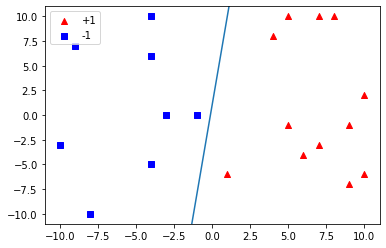

In [4]:
x1 = -11
y1 = -(w[0]*x1+w[2])/w[1]
x2 = 11
y2 = -(w[0]*x2+w[2])/w[1]

plt.plot([x1, x2], [y1, y2])
plt.scatter(positive_points[:, 0], positive_points[:, 1], marker='^', color='red', label='+1')
plt.scatter(negative_points[:, 0], negative_points[:, 1], marker='s', color='blue', label='-1')
plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.legend()
plt.show()

Rosenblatt’s Perceptron的论文在 [此处](../vendor/rosenblatt's perceptron.pdf) ，原链接：https://www.pearsonhighered.com/assets/samplechapter/0/1/3/1/0131471392.pdf

在论文中作者说对于线性可分的数据，该算法最终一定会收敛，但是其证明部分只说了**如果只有正集合的点，该算法一定会找到参数$w$是的正集合中的所有点都满足$w^T x + b > 0$**，而有负集合时的情况并没有详细说明，如果有读者知道这部分证明，欢迎和我沟通。